Predictive Models for Breast Cancer Diagnosis

made by Enrique Barreiro LimóN

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de: 

1a) Estadísticas descriptivas para todas las variables del dataframe. \
1b) Valores únicos por variable para identificar posibles variables categóricas. 

In [3]:
#Configuramos el 'id' como índice del dataframe
data_df.set_index('id', inplace=True)

#Generamos las estadísticas descriptivas para todas las variables del dataframe y transponemos el resultado
data_stats = data_df.describe().T

#Agregamos columnas para valores únicos, el valor más frecuente (top) y la frecuencia de ese valor (freq_top)
data_stats['unique'] = data_df.nunique()  #Número de valores únicos para cada variable
data_stats['Top'] = data_df.mode().iloc[0]  #Valor más frecuente para cada variable
data_stats['Freq Top'] = data_df.apply(lambda x: x.value_counts().iloc[0] if x.value_counts().size > 0 else 0)  #Frecuencia del valor más frecuente

#Filtramos las variables categóricas basadas en el umbral de valores únicos (menor a 10 valores únicos)
data_stats['Categorical'] = data_stats['unique'] < 10  #Marcamos como True las variables categóricas

#Mostramos el dataframe final con las estadísticas y la clasificación de variables categóricas
data_stats

,count,mean,std,min,25%,50%,75%,max,unique,Top,Freq Top,Categorical
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,456,12.34,4,False
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,479,14.93,3,False
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,522,82.61,3,False
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,539,512.2,3,False
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,474,0.1007,5,False
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,537,0.1147,3,False
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,537,0.0,13,False
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,542,0.0,13,False
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,432,0.1601,4,False
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,499,0.05667,3,False


In [4]:
#Identificamos automáticamente las variables categóricas
categorical_columns = [col for col in data_df.columns if data_df[col].dtype == 'object' or data_df[col].nunique() < 10]

#Creamos un DataFrame vacío para almacenar las estadísticas descriptivas de las variables categóricas
categorical_stats = pd.DataFrame(columns=['unique_values', 'top', 'freq_top'])

#Calculamos estadísticas descriptivas para cada variable categórica
for col in categorical_columns:
    unique_values = data_df[col].nunique()  #Número de valores únicos
    top_value = data_df[col].mode()[0]      #Valor más frecuente (moda)
    freq_top = data_df[col].value_counts().iloc[0]  #Frecuencia del valor más frecuente

    #Añadimos los resultados al DataFrame
    categorical_stats.loc[col] = [unique_values, top_value, freq_top]

#Mostramos el DataFrame con las estadísticas descriptivas de las variables categóricas
categorical_stats

,unique_values,top,freq_top
diagnosis,2,B,357


1c) Búsqueda de valores faltantes.

In [5]:
#Calculamos la cantidad de valores faltantes para cada columna usando isna()
missing_values = data_df.isna().sum()

#Creamos un DataFrame para mostrar los resultados
missing_values_df = pd.DataFrame(missing_values, columns=['missing_count'])
missing_values_df['missing_percentage'] = (missing_values_df['missing_count'] / len(data_df)) * 100

#Mostramos el DataFrame con el conteo y porcentaje de valores faltantes
missing_values_df

,missing_count,missing_percentage
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0
symmetry_mean,0,0.0


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno) 

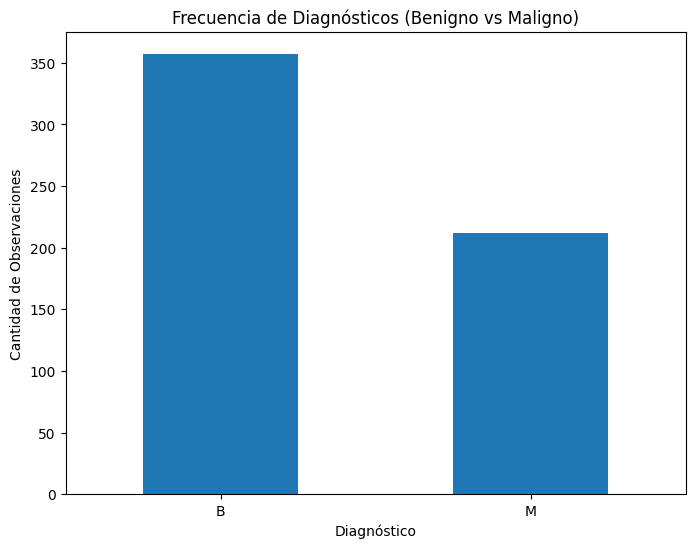

In [6]:
#Contamos la frecuencia de cada diagnóstico (benigno y maligno)
diagnosis_counts = data_df['diagnosis'].value_counts()

#Creamos el gráfico de barras
plt.figure(figsize=(8, 6))
diagnosis_counts.plot(kind='bar')
plt.title('Frecuencia de Diagnósticos (Benigno vs Maligno)')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad de Observaciones')
plt.xticks(rotation=0)  # Mantenemos las etiquetas horizontales
plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto. 

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.
 
Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe. 

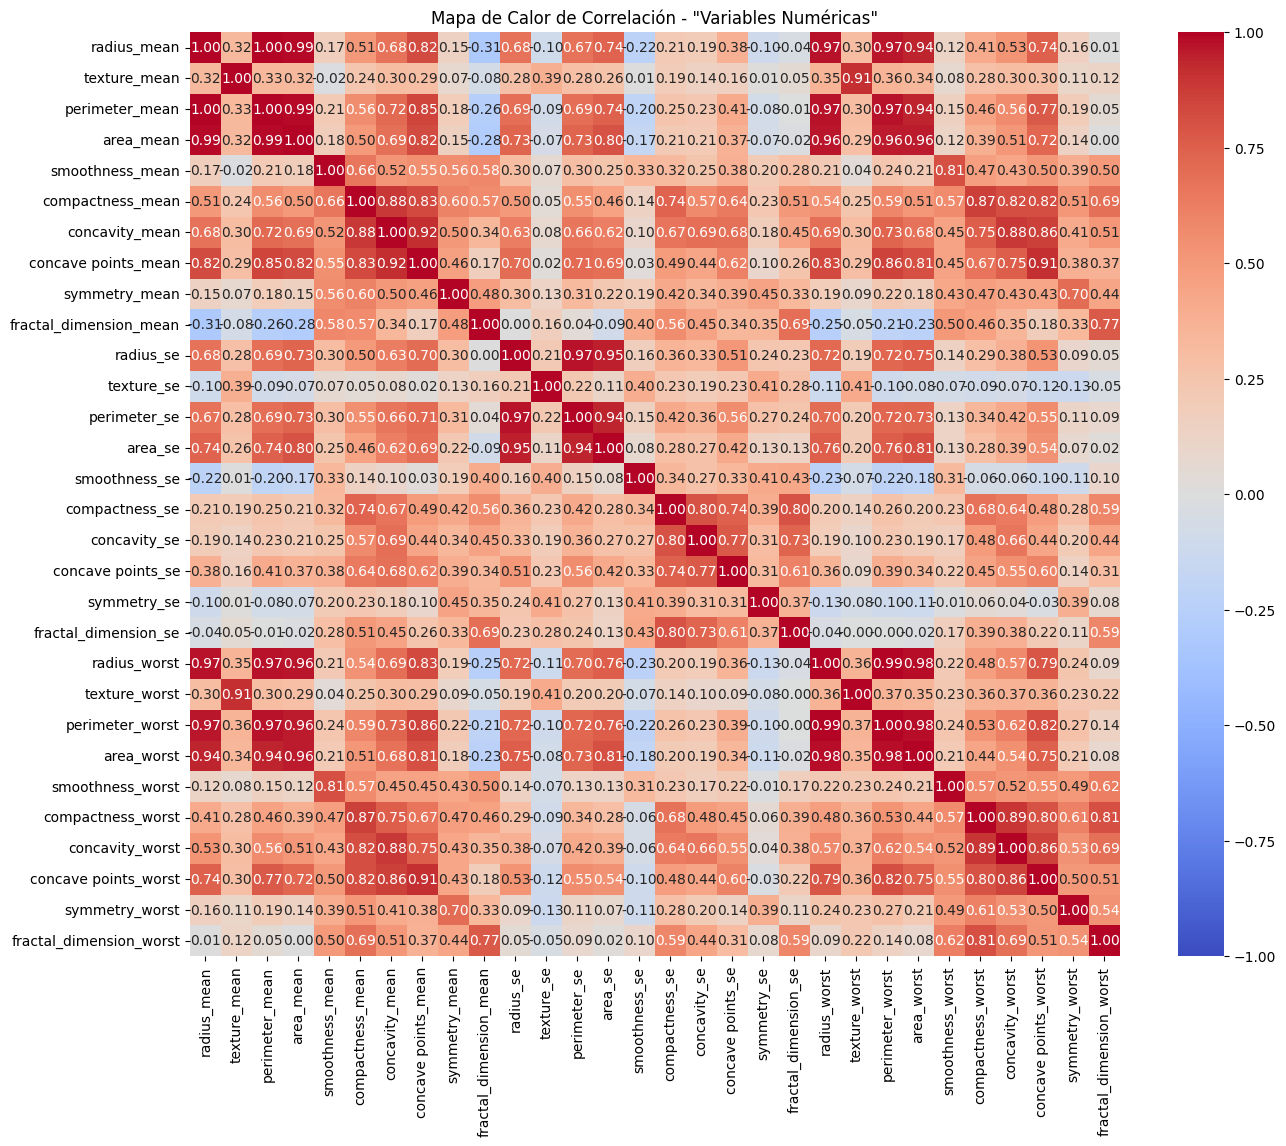

In [7]:
# Eliminamos la columna 'diagnosis' ya que es una variable categórica y no se puede incluir en el cálculo de correlación
numeric_df = data_df.drop(columns=['diagnosis'])

# Calculamos la matriz de correlación para las variables numéricas
correlation_matrix = numeric_df.corr()

# Generamos un mapa de calor con anotaciones de los coeficientes de correlación en cada cuadrante
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación - "Variables Numéricas"')
plt.show()

Para identificar las variables que presentan multicolinealidad, observamos los pares de variables con coeficientes de correlación cercanos a 1 o -1 en el mapa de calor. A continuación, algunas de las parejas que muestran alta correlación (≥ 0.9 o ≤ -0.9), lo cual indica multicolinealidad:

- radius_mean y perimeter_mean
- radius_mean y area_mean
- perimeter_mean y area_mean
- radius_worst y perimeter_worst
- radius_worst y area_worst
- perimeter_worst y area_worst
- concave points_mean y concavity_mean
- concave points_worst y concavity_worst

Estas variables están fuertemente correlacionadas y podrían causar multicolinealidad en un modelo de regresión. Para mejorar el modelo, podríamos considerar eliminar una de cada par de variables correlacionadas o aplicar técnicas de reducción de dimensionalidad, como el Análisis de Componentes Principales (PCA).

# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [8]:
#Eliminamos la columna 'diagnosis' para que solo queden variables numéricas en el DataFrame
numeric_df = data_df.drop(columns=['diagnosis'])

#Calculamos la matriz de correlación para las variables numéricas
correlation_matrix = numeric_df.corr().abs()  # Usamos el valor absoluto para detectar alta correlación positiva o negativa


#Establecemos un umbral de correlación alta 
threshold = 0.90
#El umbral (threshold) está configurado en 90% 
#Esto significa que el código está buscando pares de variables que tengan una correlación absoluta mayor a 0.90 
#lo que indica una relación muy fuerte entre esas variables.

#Creamos un conjunto para almacenar las columnas a eliminar
variables_to_drop = set()

#Iteramos sobre la matriz de correlación para identificar pares de variables altamente correlacionadas
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            colname = correlation_matrix.columns[i]
            variables_to_drop.add(colname)

#Convertimos el conjunto a una lista
variables_to_drop = list(variables_to_drop)

#Mostramos las variables que se eliminarán debido a su alta correlación con otras variables
print("Variables a eliminar por alta correlación:", variables_to_drop)

#Creamos un nuevo DataFrame sin las variables altamente correlacionadas
data_df_reduced = data_df.drop(columns=variables_to_drop)

#Mostramos las primeras filas del DataFrame reducido para verificar la eliminación de variables
data_df_reduced.T


Variables a eliminar por alta correlación: ['perimeter_se', 'concave points_worst', 'perimeter_mean', 'radius_worst', 'concave points_mean', 'area_worst', 'perimeter_worst', 'texture_worst', 'area_se', 'area_mean']


id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,...,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,M,M,M,M,M,M,B
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46,...,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,...,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,...,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,...,0.1021,0.1126,0.03558,0.2087,0.2236,0.1159,0.1034,0.1023,0.277,0.04362
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,...,0.1112,0.04462,0.0,0.255,0.3174,0.2439,0.144,0.09251,0.3514,0.0
symmetry_mean,0.2419,0.1812,0.2069,0.2597,0.1809,0.2087,0.1794,0.2196,0.235,0.203,...,0.1388,0.1537,0.106,0.2128,0.2149,0.1726,0.1752,0.159,0.2397,0.1587
fractal_dimension_mean,0.07871,0.05667,0.05999,0.09744,0.05883,0.07613,0.05742,0.07451,0.07389,0.08243,...,0.0657,0.06171,0.05502,0.07152,0.06879,0.05623,0.05533,0.05648,0.07016,0.05884
radius_se,1.095,0.5435,0.7456,0.4956,0.7572,0.3345,0.4467,0.5835,0.3063,0.2976,...,0.2388,0.3645,0.3141,0.2602,0.9622,1.176,0.7655,0.4564,0.726,0.3857
texture_se,0.9053,0.7339,0.7869,1.156,0.7813,0.8902,0.7732,1.377,1.002,1.599,...,2.904,1.492,3.896,1.205,1.026,1.256,2.463,1.075,1.595,1.428


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión

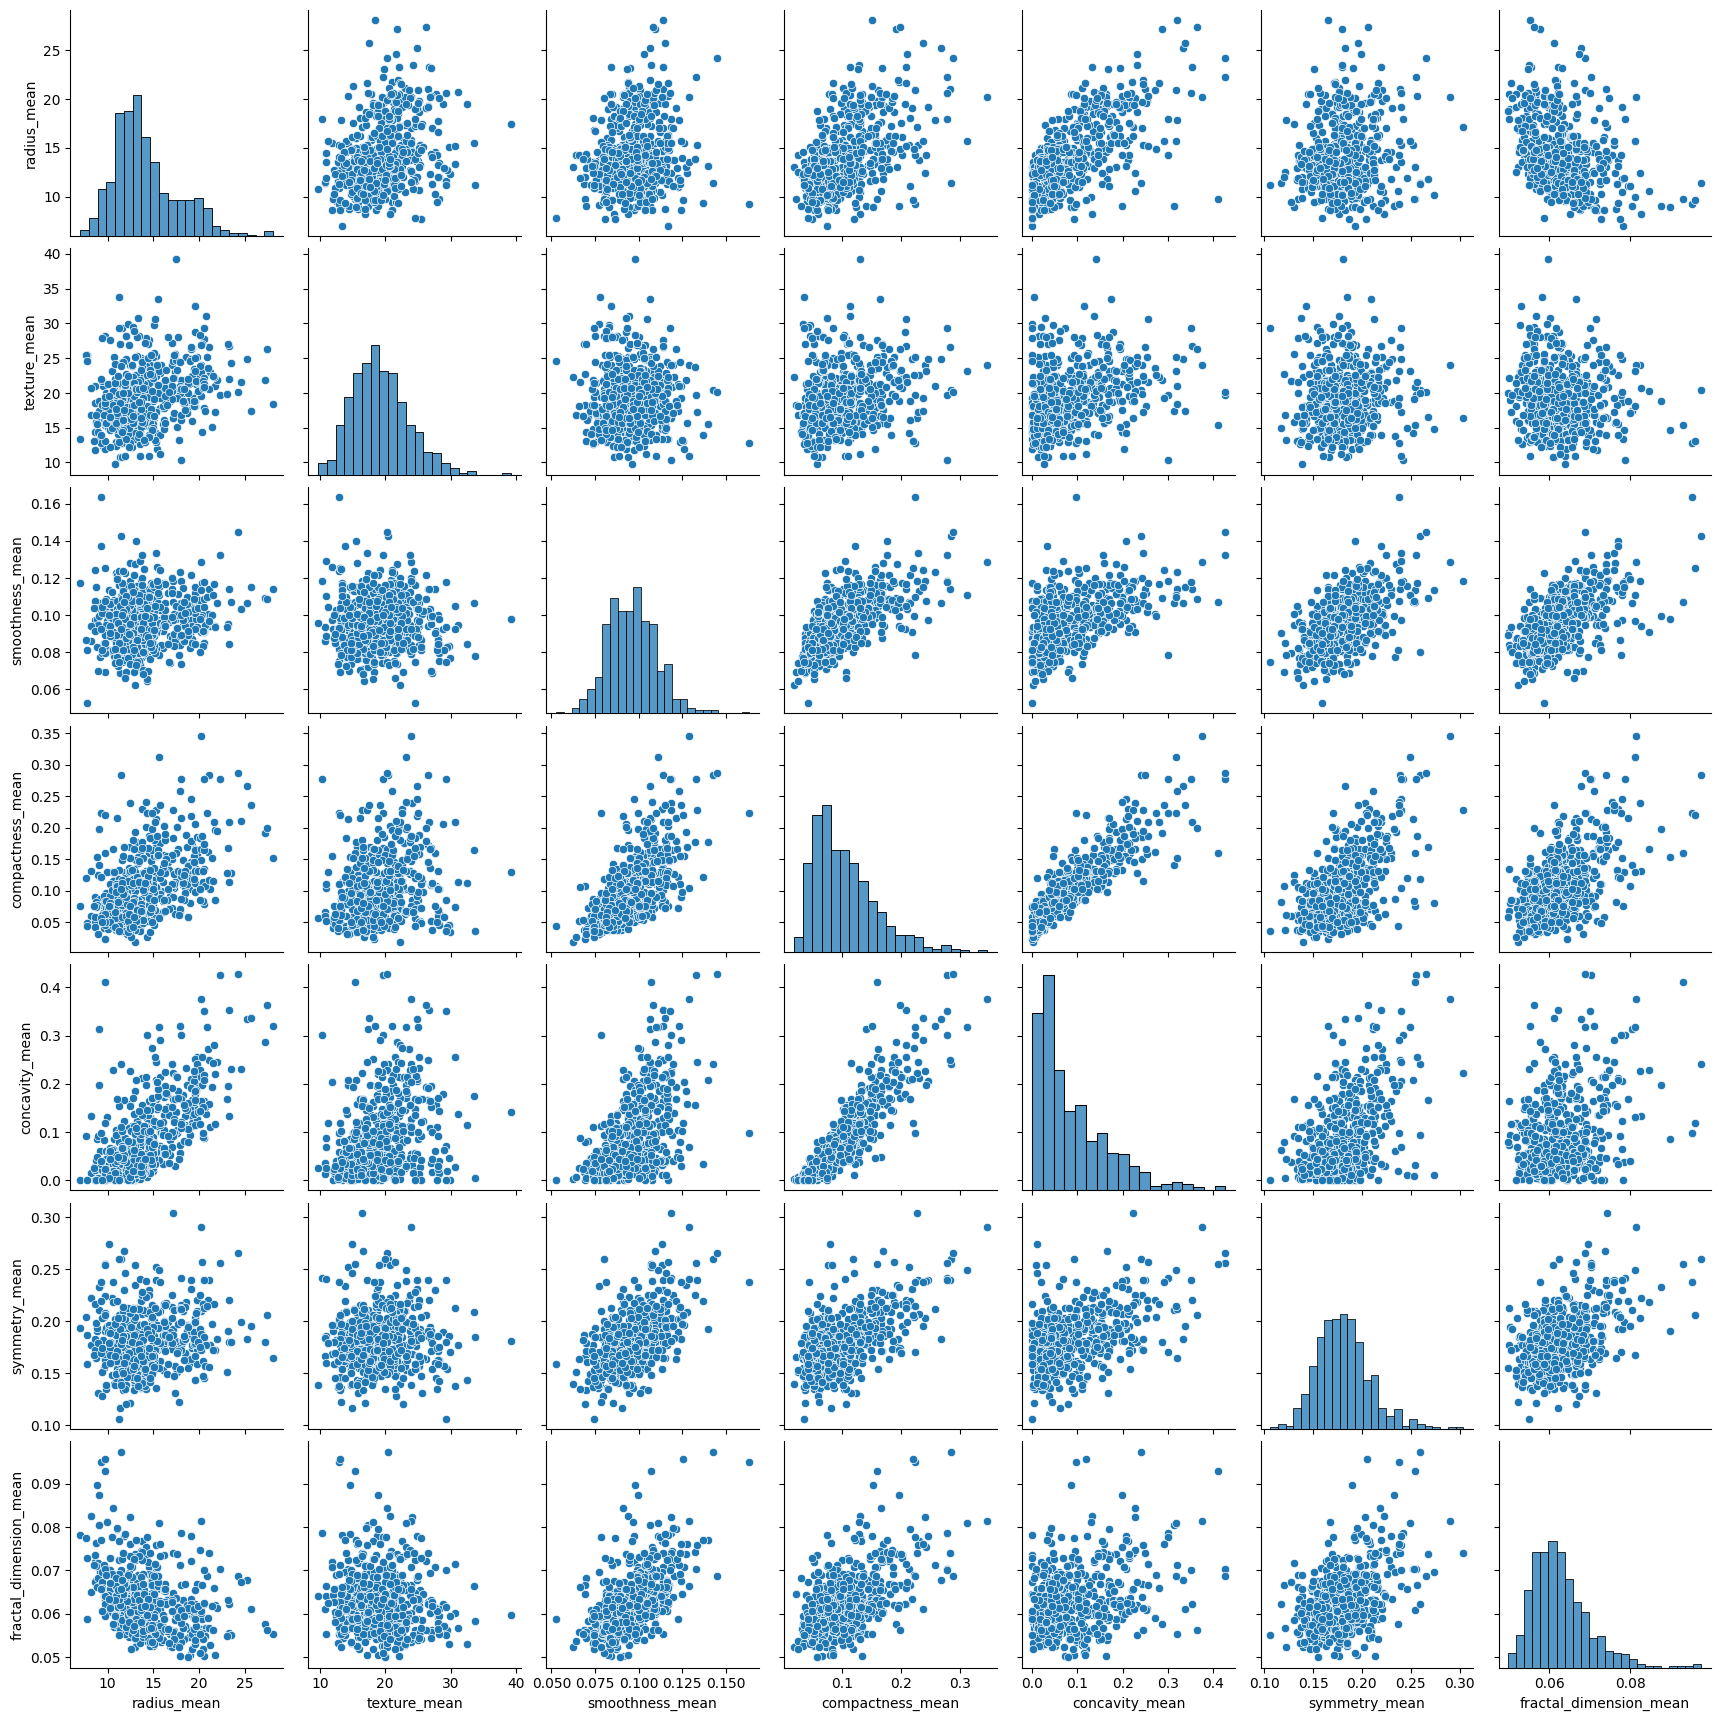

In [9]:
#Creamos una lista de las variables '_mean' que quedan después de la eliminación de las altamente correlacionadas
mean_variables = [col for col in data_df_reduced.columns if '_mean' in col]

#Generamos un pairplot para identificar patrones lineales entre las variables '_mean' restantes
sns.pairplot(data=data_df_reduced[mean_variables])

Observando el par de gráficos de dispersión en el pairplot, podemos identificar las relaciones lineales más evidentes entre algunas variables _mean. Las relaciones lineales destacadas:

- radius_mean y smoothness_mean
- radius_mean y compactness_mean
- radius_mean y concavity_mean
- compactness_mean y concavity_mean
- concavity_mean y concave points_mean
- smoothness_mean y compactness_mean

Estas relaciones muestran una tendencia lineal positiva, lo que indica una relación fuerte entre estas variables.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


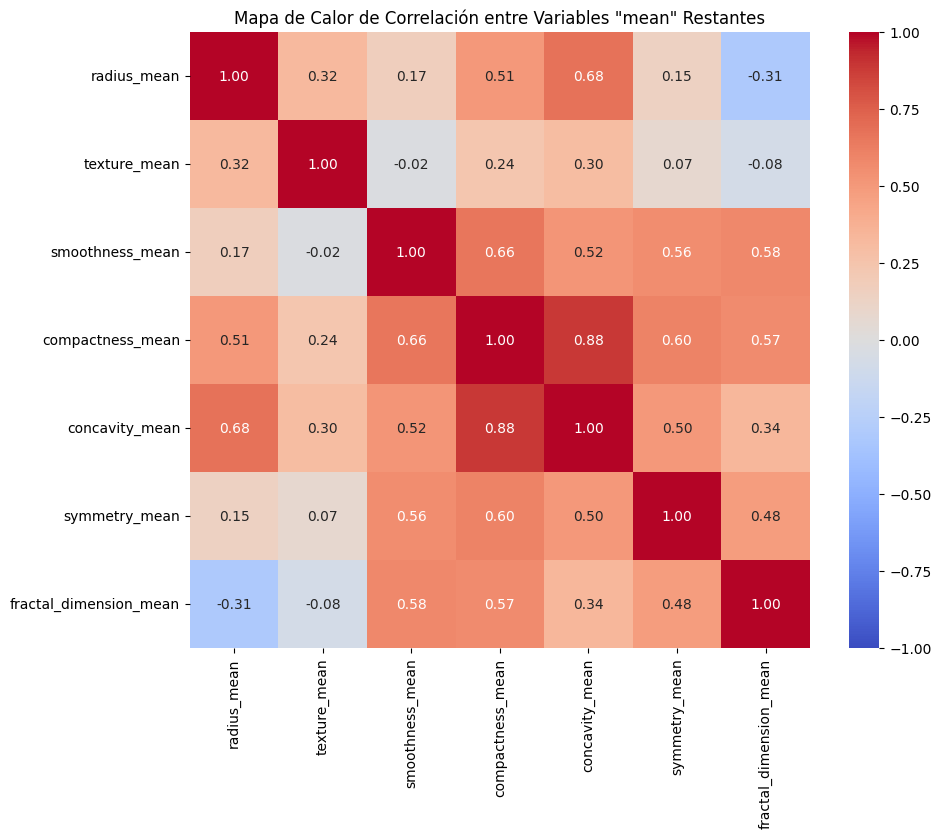

In [10]:
# Calculamos la matriz de correlación para las variables '_mean' restantes después de eliminar las altamente correlacionadas
correlation_matrix_mean = data_df_reduced[mean_variables].corr()

# Generamos un mapa de calor con anotaciones de los coeficientes de correlación en cada cuadrante
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_mean, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación entre Variables "mean" Restantes')
plt.show()

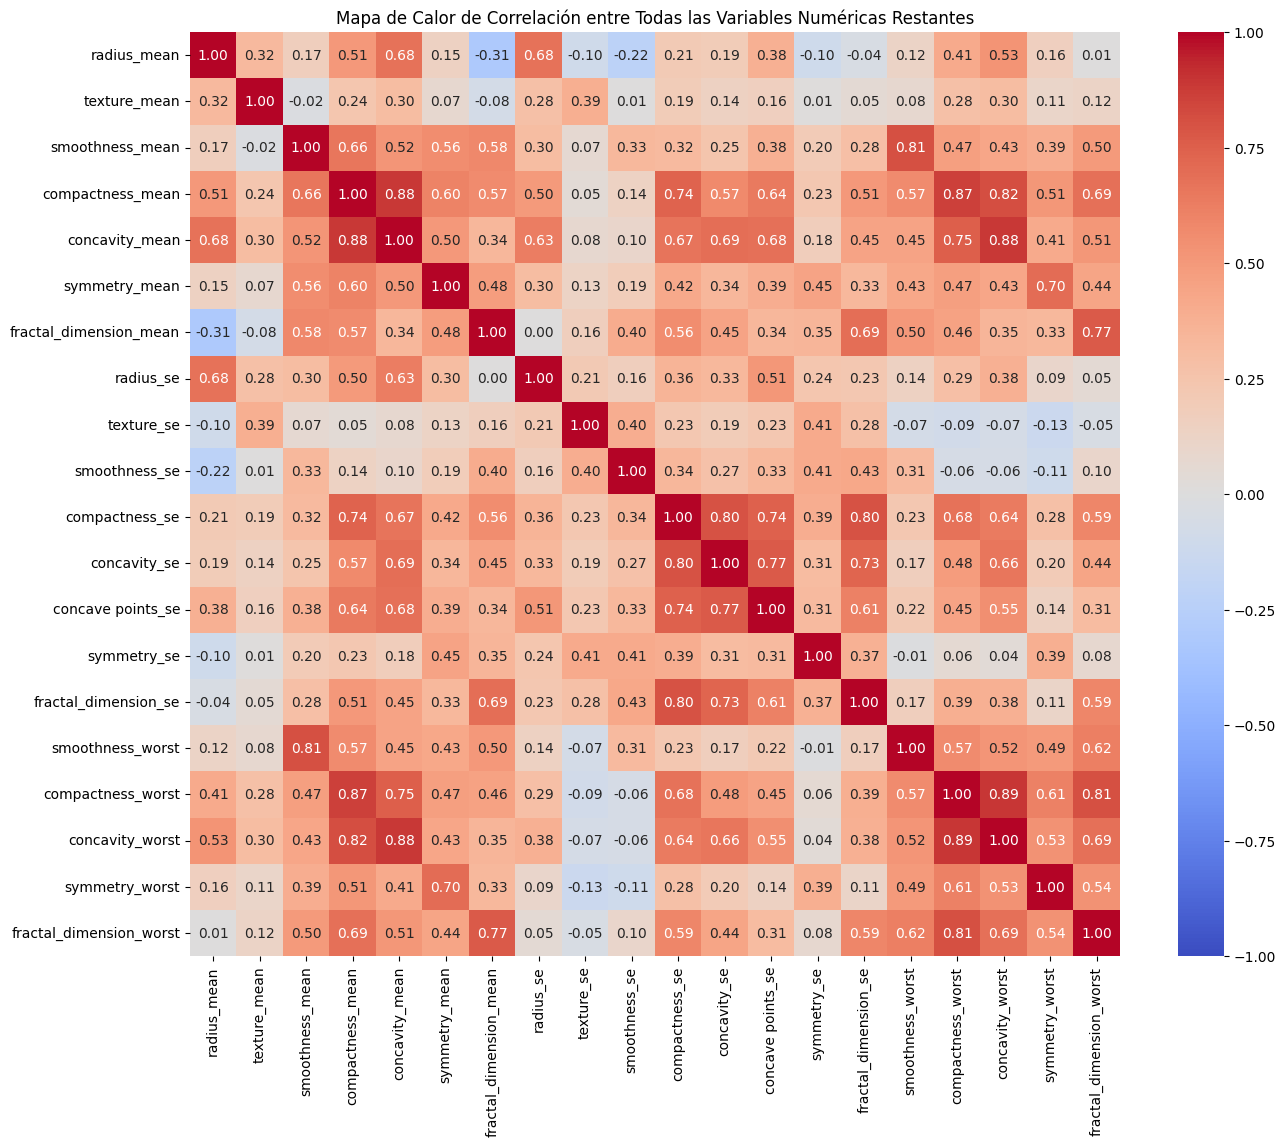

In [11]:
# Eliminamos la columna 'diagnosis' para que solo queden variables numéricas en el DataFrame
data_df_numeric = data_df_reduced.drop(columns=['diagnosis'])

# Calculamos la matriz de correlación para todas las variables numéricas restantes
correlation_matrix_reduced = data_df_numeric.corr()

# Generamos un mapa de calor con anotaciones de los coeficientes de correlación en cada cuadrante
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_reduced, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación entre Todas las Variables Numéricas Restantes')
plt.show()


3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío. Eligiendo una variable representativa de cada grupo altamente correlacionado y eliminamos las restantes.

In [12]:
#Verificamos si la columna 'diagnosis' está presente y la eliminamos si es así
if 'diagnosis' in data_df.columns:
    numeric_df = data_df.drop(columns=['diagnosis'])
else:
    numeric_df = data_df.copy()

#Calculamos la matriz de correlación de todas las variables numéricas restantes
correlation_matrix = numeric_df.corr().abs()

#Establecemos el umbral de correlación alta (0.90)
threshold = 0.90

#Lista para almacenar las variables a eliminar
variables_to_drop = set()

#Iteramos sobre la matriz de correlación y seleccionamos una variable de cada grupo correlacionado
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:
            colname = correlation_matrix.columns[i]
            #Agregamos la variable a eliminar (manteniendo una por cada grupo)
            variables_to_drop.add(colname)

#Convertimos el conjunto a una lista
variables_to_drop = list(variables_to_drop)

#Imprimimos las variables que se eliminarán
print("Variables a eliminar:", variables_to_drop)

#Eliminamos las variables redundantes del DataFrame original
data_df_final = numeric_df.drop(columns=variables_to_drop)

#Mostramos las primeras filas del DataFrame final para verificar
data_df_final.head().T

Variables a eliminar: ['perimeter_se', 'concave points_worst', 'perimeter_mean', 'radius_worst', 'concave points_mean', 'area_worst', 'perimeter_worst', 'texture_worst', 'area_se', 'area_mean']


id,842302,842517,84300903,84348301,84358402
radius_mean,17.990000,20.570000,19.690000,11.420000,20.290000
texture_mean,10.380000,17.770000,21.250000,20.380000,14.340000
smoothness_mean,0.118400,0.084740,0.109600,0.142500,0.100300
compactness_mean,0.277600,0.078640,0.159900,0.283900,0.132800
concavity_mean,0.300100,0.086900,0.197400,0.241400,0.198000
symmetry_mean,0.241900,0.181200,0.206900,0.259700,0.180900
fractal_dimension_mean,0.078710,0.056670,0.059990,0.097440,0.058830
radius_se,1.095000,0.543500,0.745600,0.495600,0.757200
texture_se,0.905300,0.733900,0.786900,1.156000,0.781300
smoothness_se,0.006399,0.005225,0.006150,0.009110,0.011490


In [13]:
# Muestra el número de variables que quedaron en el DataFrame final después de eliminar las altamente correlacionadas
print("Número de variables que quedaron:", len(data_df_final.columns))

Número de variables que quedaron: 20


Para justificar nuestro enfoque y los resultados obtenidos, es importante explicar por qué decidimos modificar las instrucciones iniciales. La indicación original pedía eliminar las variables con alta correlación en el conjunto de datos, específicamente mencionando la eliminación de las columnas que contenían "_worst". Sin embargo, en lugar de aplicar este criterio de manera literal, nuestro equipo optó por un análisis más detallado de las variables, basándonos en una evaluación cuantitativa para seleccionar las variables correlacionadas de una forma más objetiva.

En primer lugar, realizamos un análisis de correlación exhaustivo en el que establecimos un umbral de 90% de correlación para identificar las variables que estaban fuertemente correlacionadas. Este valor se determinó de forma conjunta en el equipo, con el objetivo de que solo las variables con una correlación realmente alta fueran eliminadas, lo que nos permitió conservar información importante en el modelo. Utilizar un umbral de 90% nos brindó una base cuantitativa sólida para respaldar las eliminaciones, en lugar de basarnos únicamente en la eliminación de un conjunto visual (para todas las variables _mean o _worst).

Este enfoque, más allá de cumplir con las instrucciones iniciales, añade rigor al proceso de selección de variables, garantizando que no se elimine información útil de manera arbitraria. Finalmente, el impacto de esta metodología se reflejó en una mejor predicción del modelo, al mantener variables relevantes y reducir la multicolinealidad de forma controlada.

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1. 

In [14]:
#Calculamos el sesgo (skew) de cada variable en el DataFrame final
skew_values = data_df_final.skew()

#Seleccionamos las columnas con sesgo positivo mayor a 1
skew_cols = skew_values[skew_values > 1].index.tolist()

#Mostramos las columnas con sesgo positivo marcado
print("Columnas con sesgo positivo mayor a 1:", skew_cols)

Columnas con sesgo positivo mayor a 1: ['compactness_mean', 'concavity_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


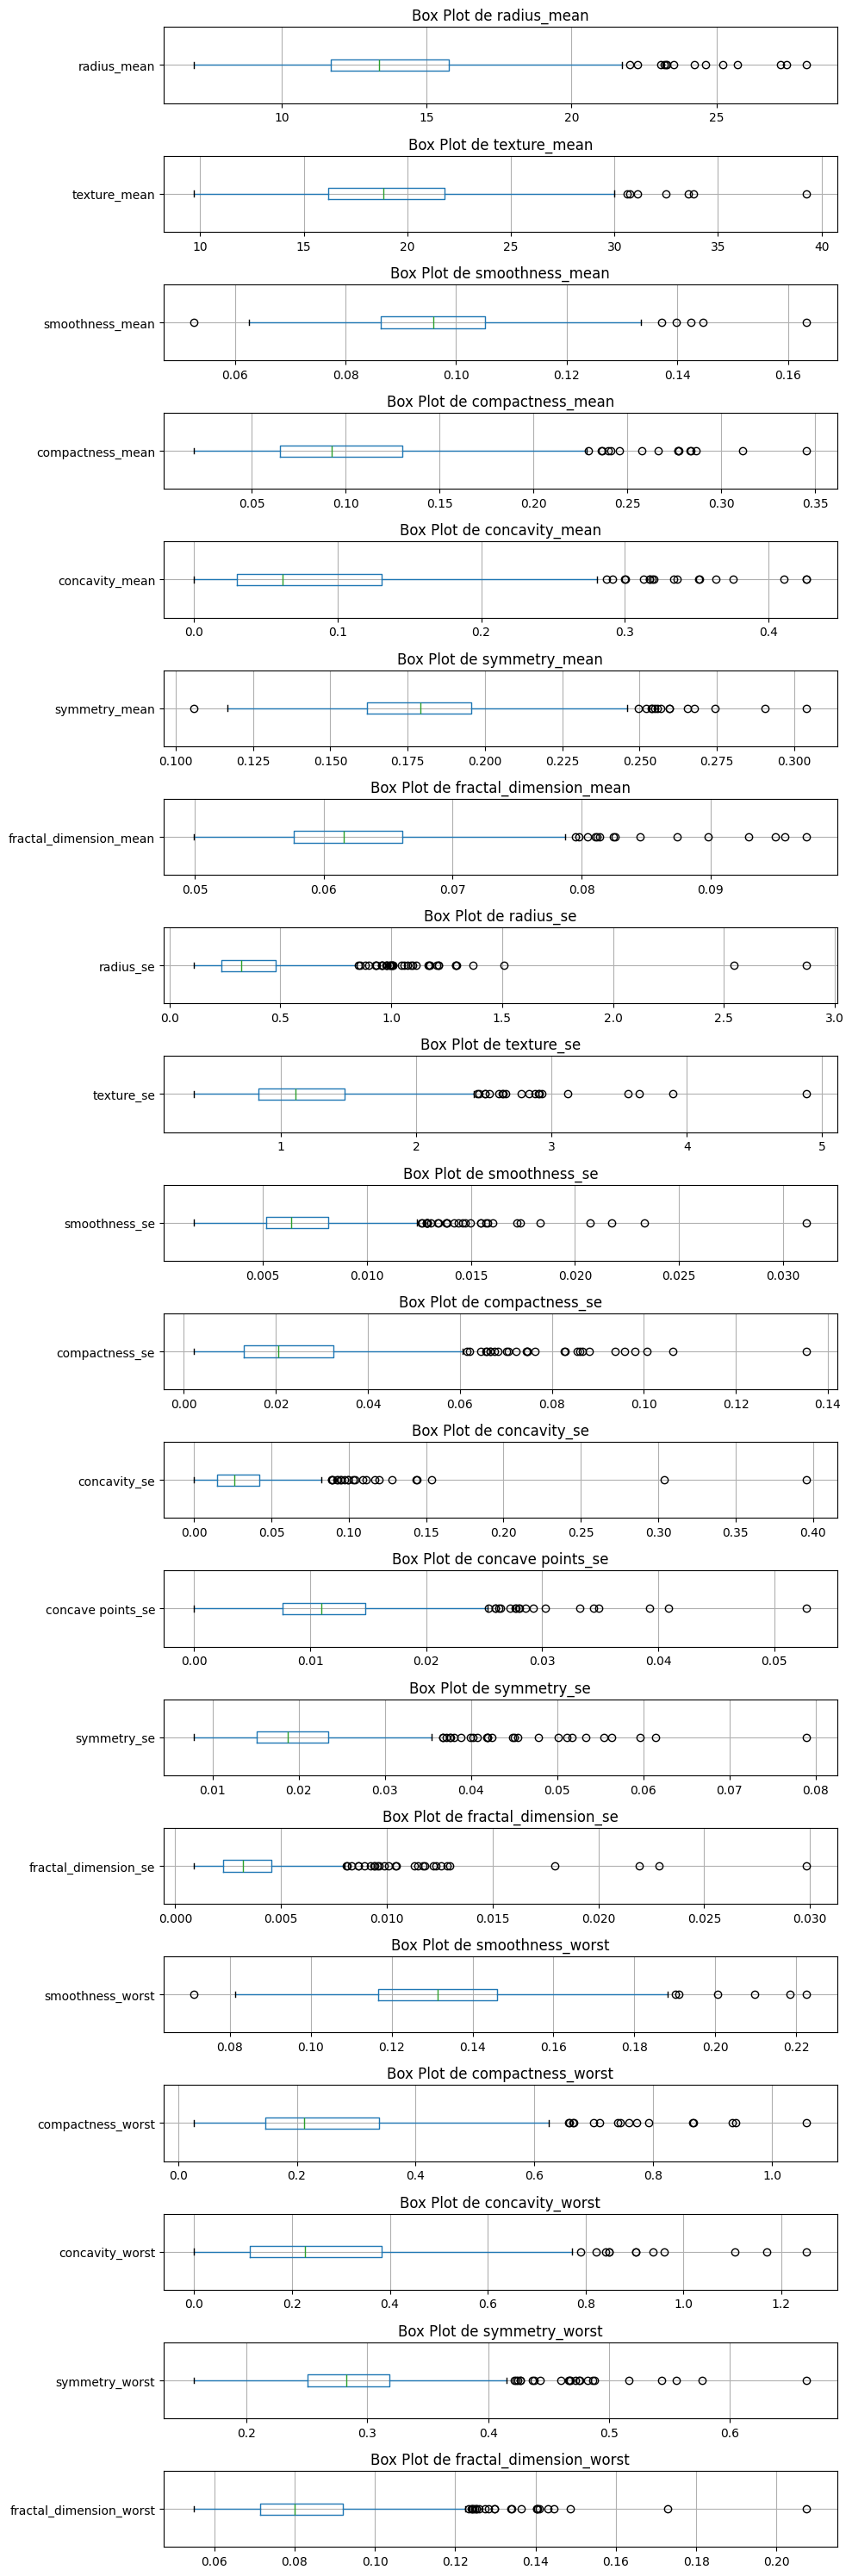

In [15]:
#Configuramos el tamaño de la figura para múltiples box plots
fig, axes = plt.subplots(nrows=len(data_df_final.columns), ncols=1, figsize=(10, 1.5 * len(data_df_final.columns)))

#Dibujamos cada box plot de manera individual en cada fila
for i, col in enumerate(data_df_final.columns):
    data_df_final.boxplot(column=col, ax=axes[i], vert=False)  # vert=False para hacer los box plots horizontales
    axes[i].set_title(f'Box Plot de {col}')

#Ajustamos el layout para que no se sobrepongan los títulos
plt.tight_layout()
plt.show()

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [16]:
#Importamos las librerías necesarias
from sklearn.model_selection import train_test_split


#Separamos las variables predictoras (X) y la variable de respuesta (y)
X = data_df.drop(columns=['diagnosis'])  # Todas las variables excepto 'diagnosis'
y = data_df['diagnosis']  # Variable de salida

#Dividimos el conjunto en entrenamiento y prueba (80:20) con random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Verificamos la forma de los conjuntos de entrenamiento y prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [17]:
#Importamos las librerías necesarias
from sklearn.compose import ColumnTransformer

#Creamos el transformador para eliminar las columnas altamente correlacionadas usando la variable existente 'variables_to_drop'
preprocessing = ColumnTransformer(
    transformers=[('drop_high_corr', 'drop', variables_to_drop)],
    remainder='passthrough'  # Mantiene el resto de las columnas sin cambios
)

#Mostramos el transformador configurado
print(preprocessing)

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop_high_corr', 'drop',
                                 ['perimeter_se', 'concave points_worst',
                                  'perimeter_mean', 'radius_worst',
                                  'concave points_mean', 'area_worst',
                                  'perimeter_worst', 'texture_worst', 'area_se',
                                  'area_mean'])])


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística. 

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo. 

In [18]:
#Importamos las librerías necesarias
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer

#Creamos el transformador para eliminar las columnas altamente correlacionadas usando la variable existente 'variables_to_drop'
preprocessing = ColumnTransformer(
    transformers=[('drop_high_corr', 'drop', variables_to_drop)],
    remainder='passthrough'  # Mantiene el resto de las columnas sin cambios
)

# Creamos el pipeline que incluye el transformador y el modelo de regresión logística
logr_model = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('logistic_regression', LogisticRegression(random_state=1))
])

# Entrenamos el modelo en el conjunto de entrenamiento
logr_model.fit(X_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred = logr_model.predict(X_test)

# Evaluamos el modelo con métricas de rendimiento
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
# Precisión, exactitud y recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')

# Mostramos los resultados de evaluación con títulos descriptivos
print("Matriz de Confusión:")
print(conf_matrix)

print("\nExactitud (Accuracy):")
print(accuracy)

print("\nPrecisión (Precision) para clase 'M':")
print(precision)

print("\nSensibilidad (Recall) para clase 'M':")
print(recall)

Matriz de Confusión:
[[69  3]
 [ 7 35]]

Exactitud (Accuracy):
0.9122807017543859

Precisión (Precision) para clase 'M':
0.9210526315789473

Sensibilidad (Recall) para clase 'M':
0.8333333333333334


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'` 

In [ ]:
#Importamos las librerías necesarias para la transformación
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline

#Transformador de raíz cuadrada para corregir el sesgo
sqrt_transformer = FunctionTransformer(func=lambda x: x**0.5, validate=True)

#Creamos el transformador para realizar el borrado, aplicar raíz cuadrada y escalamiento
preprocessing2 = ColumnTransformer(
    transformers=[
        ('drop_high_corr', 'drop', variables_to_drop),  #Borramos las columnas altamente correlacionadas
        ('sqrt_skewed', sqrt_transformer, skew_cols),   #Aplicamos raíz cuadrada a las columnas con sesgo positivo
        ('scale', MinMaxScaler(), scale_cols)           #Escalamos las columnas fuera del intervalo [0,1]
    ],
    remainder='passthrough'  #Mantiene el resto de las columnas sin cambios
)

#Mostramos el nuevo transformador configurado
print(preprocessing2)

ColumnTransformer(remainder='passthrough',
                  transformers=[('drop_high_corr', 'drop',
                                 ['perimeter_mean', 'area_mean',
                                  'concavity_mean', 'concave points_mean',
                                  'perimeter_se', 'area_se', 'compactness_se',
                                  'concavity_se', 'concave points_se',
                                  'perimeter_worst', 'area_worst',
                                  'smoothness_worst', 'compactness_worst',
                                  'concavity_worst', 'concave points_worst',
                                  'symmetry_worst...
                                  'fractal_dimension_mean', 'radius_se',
                                  'texture_se', 'smoothness_se',
                                  'compactness_se', 'concavity_se',
                                  'concave points_se', 'symmetry_se',
                                  'fractal_dimension_se', 'c

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [ ]:
#Creamos el pipeline que incluye el transformador modificado y el modelo de regresión logística
logr_model2 = Pipeline(steps=[
    ('preprocessing', preprocessing2),
    ('logistic_regression', LogisticRegression(random_state=1))
])

#Entrenamos el modelo en el conjunto de entrenamiento
logr_model2.fit(X_train, y_train)

#Hacemos predicciones en el conjunto de prueba
y_pred2 = logr_model2.predict(X_test)

#Evaluamos el modelo con métricas de rendimiento
#Matriz de confusión
conf_matrix2 = confusion_matrix(y_test, y_pred2, labels=['B', 'M'])

#Precisión, exactitud y recall
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2, pos_label='M')
recall2 = recall_score(y_test, y_pred2, pos_label='M')

#Mostramos los resultados de evaluación con títulos descriptivos
print("Matriz de Confusión (Modelo 2):")
print(conf_matrix2)

print("\nExactitud (Accuracy) del Modelo 2:")
print(accuracy2)

print("\nPrecisión (Precision) para clase 'M' del Modelo 2:")
print(precision2)

print("\nSensibilidad (Recall) para clase 'M' del Modelo 2:")
print(recall2)

Matriz de Confusión (Modelo 2):
[[71  1]
 [ 6 36]]

Exactitud (Accuracy) del Modelo 2:
0.9385964912280702

Precisión (Precision) para clase 'M' del Modelo 2:
0.972972972972973

Sensibilidad (Recall) para clase 'M' del Modelo 2:
0.8571428571428571


# **Parte 3**. Modelo con aplicación de PCA 

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [21]:
# Importamos StandardScaler para escalar las variables
from sklearn.preprocessing import StandardScaler

# Creamos una instancia de StandardScaler
scaler = StandardScaler()

# Aplicamos el escalado a las variables predictoras X
X_scaled = scaler.fit_transform(X)

# Mostramos las primeras filas del conjunto escalado para verificar
pd.DataFrame(X_scaled, columns=X.columns).T

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
radius_mean,1.097064,1.829821,1.579888,-0.768909,1.750297,-0.476375,1.170908,-0.118517,-0.320167,-0.473535,...,-0.743348,-0.021952,-0.831392,0.310345,1.929226,2.110995,1.704854,0.702284,1.838341,-1.808401
texture_mean,-2.073335,-0.353632,0.456187,0.253732,-1.151816,-0.835335,0.160649,0.358450,0.588830,1.105439,...,1.079841,1.829157,2.345765,2.636649,1.349781,0.721473,2.085134,2.045574,2.336457,1.221792
perimeter_mean,1.269934,1.685955,1.566503,-0.592687,1.776573,-0.387148,1.138125,-0.072867,-0.184080,-0.329482,...,-0.718729,-0.024262,-0.877311,0.470844,2.101976,2.060786,1.615931,0.672676,1.982524,-1.814389
area_mean,0.984375,1.908708,1.558884,-0.764464,1.826229,-0.505650,1.095295,-0.218965,-0.384207,-0.509063,...,-0.714976,-0.154973,-0.764748,0.176365,1.968434,2.343856,1.723842,0.577953,1.735218,-1.347789
smoothness_mean,1.568466,-0.826962,0.942210,3.283553,0.280372,2.237421,-0.123136,1.604049,2.201839,1.582699,...,-0.266890,0.208495,-1.556408,0.600616,0.963560,1.041842,0.102458,-0.840484,1.525767,-3.112085
compactness_mean,3.283515,-0.487072,1.052926,3.402909,0.539340,1.244335,0.088295,1.140102,1.684010,2.563358,...,-0.042470,0.156521,-1.303122,1.977758,2.260135,0.219060,-0.017833,-0.038680,3.272144,-1.150752
concavity_mean,2.652874,-0.023846,1.363478,1.915897,1.371011,0.866302,0.300072,0.061026,1.219096,1.738872,...,0.281240,-0.554670,-1.114873,2.086645,2.870075,1.947285,0.693043,0.046588,3.296944,-1.114873
concave points_mean,2.532475,0.548144,2.037231,1.451707,1.428493,0.824656,0.646935,0.281950,1.150692,0.941760,...,-0.202977,-0.151647,-1.261820,1.170295,2.540213,2.320965,1.263669,0.105777,2.658866,-1.261820
symmetry_mean,2.217515,0.001392,0.939685,2.867383,-0.009560,1.005402,-0.064325,1.403355,1.965600,0.797298,...,-1.546608,-1.002617,-2.744117,1.155090,1.231760,-0.312589,-0.217664,-0.809117,2.137194,-0.820070
fractal_dimension_mean,2.255747,-0.868652,-0.398008,4.910919,-0.562450,1.890005,-0.762332,1.660353,1.572462,2.783096,...,0.411444,-0.154180,-1.102557,1.236490,0.849484,-0.931027,-1.058611,-0.895587,1.043695,-0.561032


8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza. 

In [23]:
# Importamos StandardScaler y PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Escalamos las variables predictoras X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos PCA al conjunto escalado
pca = PCA()
pca.fit(X_scaled)

# Calculamos el número de componentes necesarios para explicar el 99% de la varianza
cumulative_variance = pca.explained_variance_ratio_.cumsum()
num_components_99 = next(i for i, total_var in enumerate(cumulative_variance) if total_var >= 0.99) + 1

# Mostramos el número de componentes necesarios para explicar el 99% de la varianza
print("Número de componentes necesarios para explicar el 99% de la varianza:", num_components_99)

Número de componentes necesarios para explicar el 99% de la varianza: 17


9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [24]:
# Importamos LogisticRegression y Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Creamos el pipeline con escalamiento, PCA y regresión logística
logr_model3 = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Escalamiento estándar
    ('pca', PCA(n_components=num_components_99)),  # PCA con el número de componentes que explican el 99% de la varianza
    ('logistic_regression', LogisticRegression(random_state=1))  # Regresión logística
])

# Entrenamos el modelo en el conjunto de entrenamiento
logr_model3.fit(X_train, y_train)

# Hacemos predicciones en el conjunto de prueba
y_pred3 = logr_model3.predict(X_test)

# Evaluamos el modelo con las mismas métricas de rendimiento
conf_matrix3 = confusion_matrix(y_test, y_pred3, labels=['B', 'M'])
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3, pos_label='M')
recall3 = recall_score(y_test, y_pred3, pos_label='M')

# Mostramos los resultados de evaluación con títulos descriptivos
print("Matriz de Confusión (Modelo 3 con PCA):")
print(conf_matrix3)

print("\nExactitud (Accuracy) del Modelo 3:")
print(accuracy3)

print("\nPrecisión (Precision) para clase 'M' del Modelo 3:")
print(precision3)

print("\nSensibilidad (Recall) para clase 'M' del Modelo 3:")
print(recall3)

Matriz de Confusión (Modelo 3 con PCA):
[[72  0]
 [ 2 40]]

Exactitud (Accuracy) del Modelo 3:
0.9824561403508771

Precisión (Precision) para clase 'M' del Modelo 3:
1.0

Sensibilidad (Recall) para clase 'M' del Modelo 3:
0.9523809523809523


10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué? 

En un modelo de diagnóstico médico, la métrica más importante generalmente es recall (sensibilidad o tasa de verdaderos positivos), especialmente en el contexto de diagnóstico de enfermedades graves, como el cáncer de mama. 

### **¿Por qué es más importante el recall?**
La sensibilidad mide la proporción de casos positivos (enfermedad presente) que el modelo detecta correctamente. En un diagnóstico médico, fallar en identificar un caso positivo (falso negativo) puede tener consecuencias graves porque implica no detectar una enfermedad que necesita tratamiento. En este contexto, es preferible que el modelo identifique a la mayoría de los casos con la enfermedad, incluso si eso significa aumentar la tasa de falsos positivos (personas sin la enfermedad que reciben un diagnóstico positivo).

### **¿Cómo ajustar el threshold para priorizar el recall?**
El threshold es el punto de corte que define si una predicción del modelo es clasificada como positiva o negativa. Al disminuir el threshold (es decir, reducir el puntaje mínimo requerido para clasificar como positivo), se logra:

- Aumentar el recall, ya que el modelo se vuelve más sensible y es más probable que detecte todos los casos positivos.
- Aumentar los falsos positivos, porque algunos individuos que realmente no tienen la enfermedad podrían clasificarse incorrectamente como positivos.

**En términos prácticos:** Un threshold más bajo aumenta la probabilidad de capturar todos los casos de enfermedad, lo cual es crucial en contextos médicos donde se prioriza no dejar casos sin diagnóstico.


### Conclusión
Para un diagnóstico médico, un modelo debe minimizar el riesgo de falsos negativos, ya que un falso negativo significa perder la oportunidad de tratar a una persona enferma, lo cual puede empeorar el pronóstico. Esto no significa ignorar la precisión o exactitud, pero en situaciones críticas es aceptable tratar algunos falsos positivos con pruebas adicionales (de bajo riesgo) para confirmar el diagnóstico. La prioridad debe ser garantizar que todos los casos con enfermedad sean detectados en la primera instancia, y este enfoque de bajo threshold maximiza la oportunidad de tratamiento temprano, que es fundamental para mejorar la supervivencia en casos como el cáncer.